# 1.4.15 Image Segmentation with Watershed Algorithm

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('./img/coin/coin_5.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [4]:
cv2.imshow('image',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

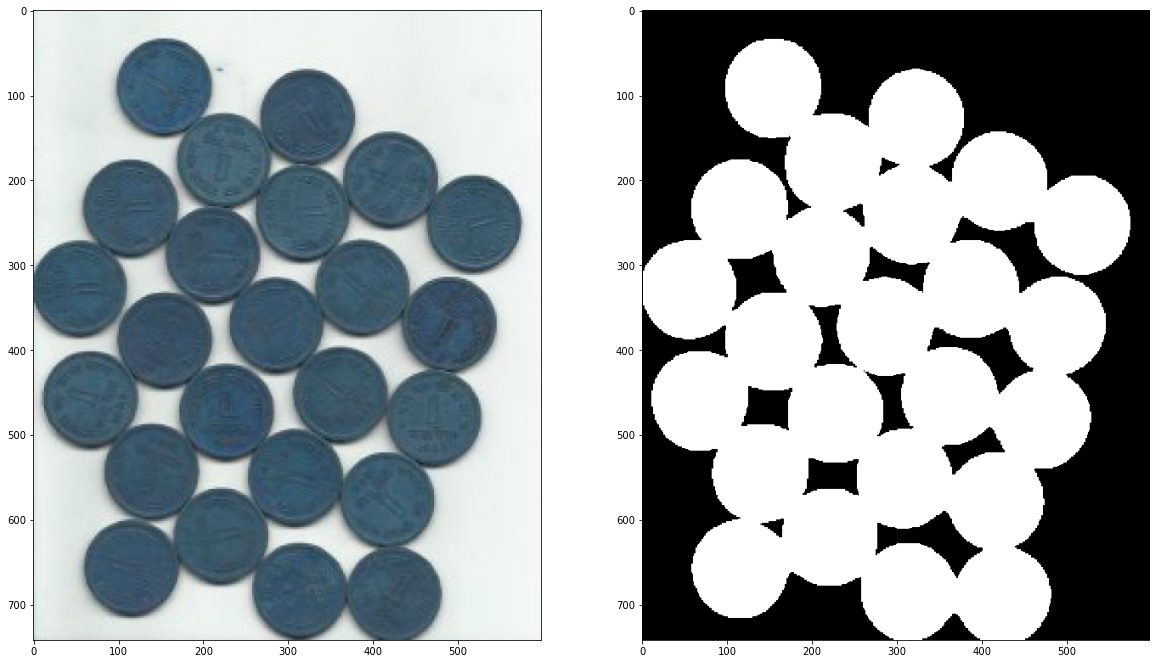

In [6]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(img,'gray')
plt.subplot(122), plt.imshow(opening,'gray')
plt.show()

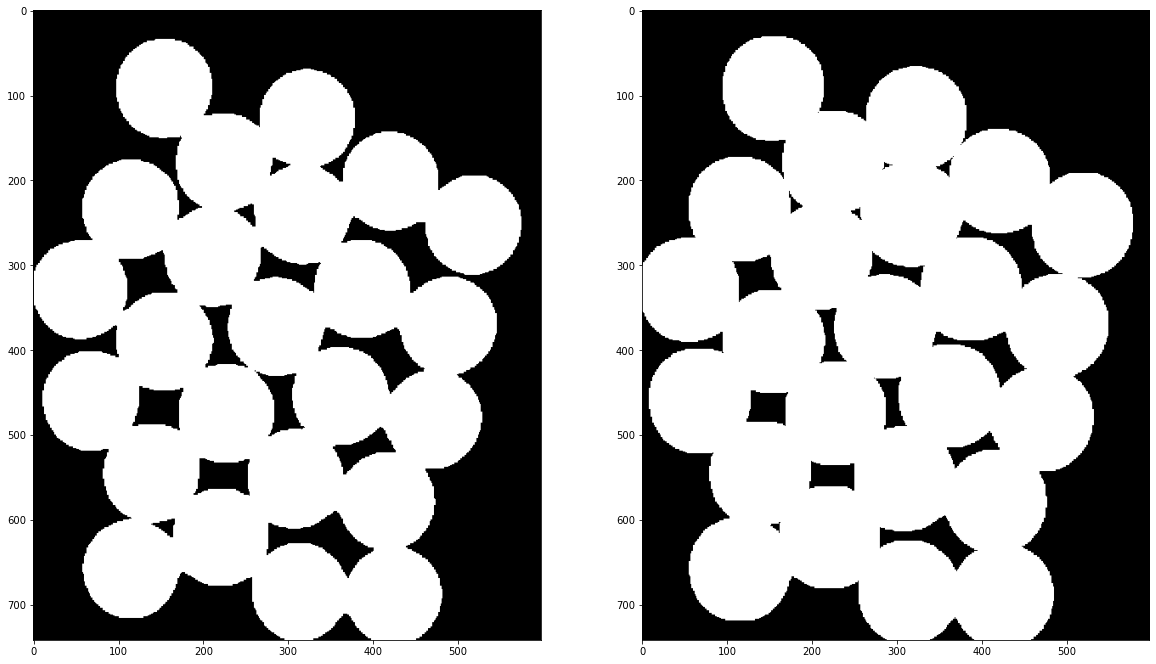

In [7]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(opening,'gray')
plt.subplot(122), plt.imshow(sure_bg,'gray')
plt.show()

In [9]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

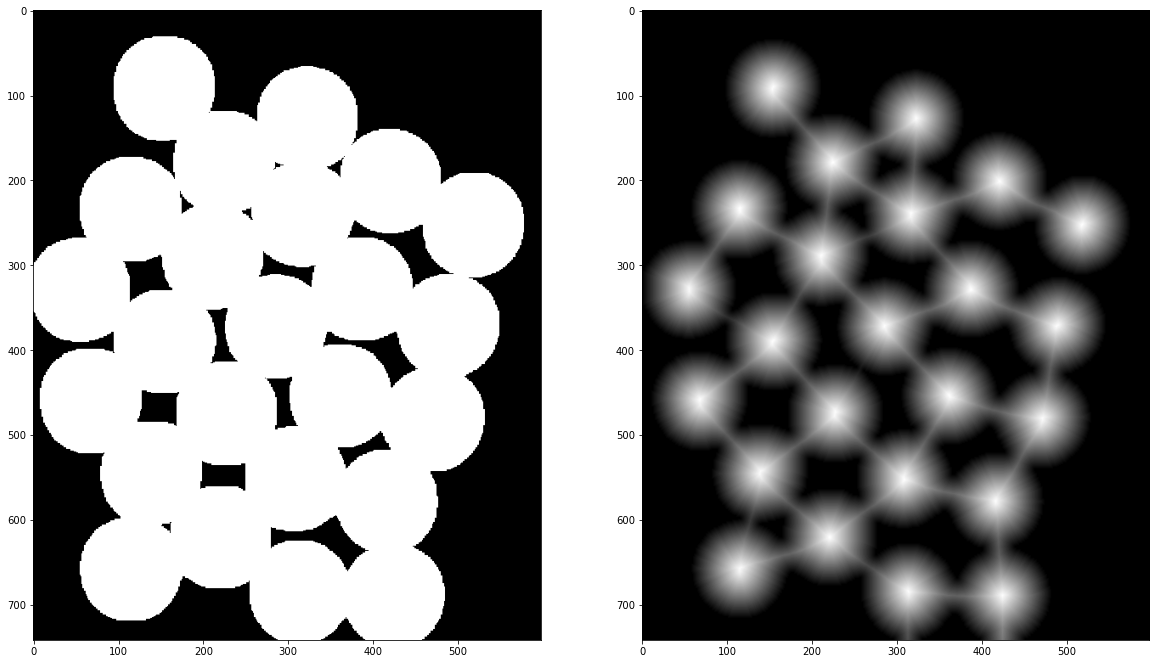

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(sure_bg,'gray')
plt.subplot(122), plt.imshow(dist_transform,'gray')
plt.show()

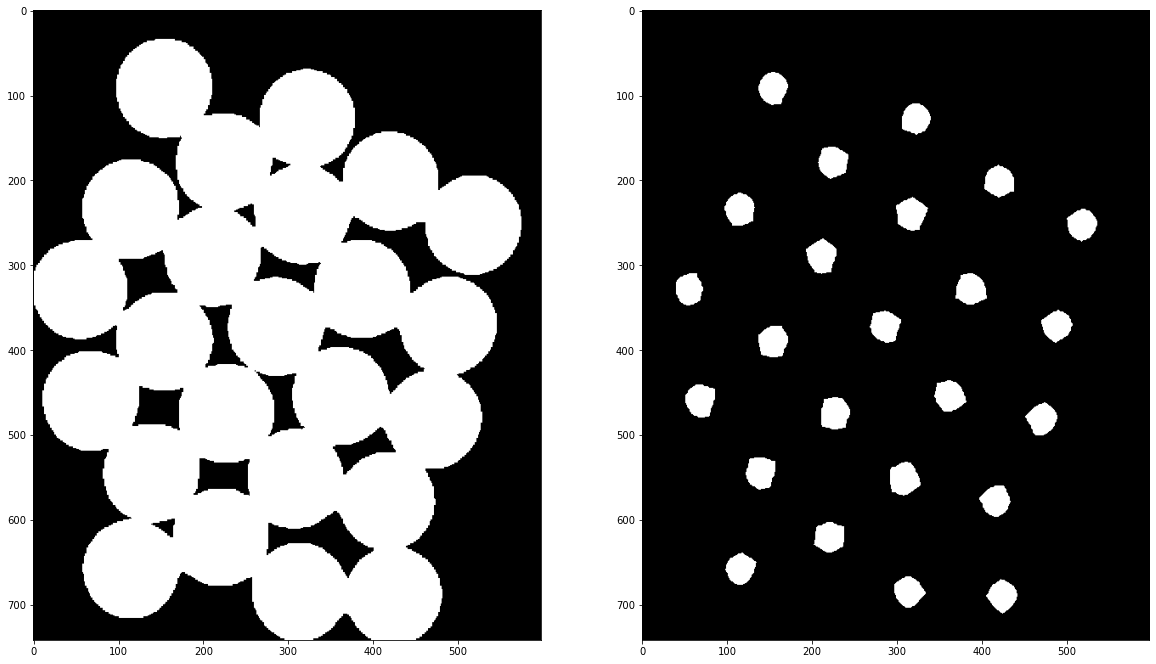

In [11]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(opening,'gray')
plt.subplot(122), plt.imshow(sure_fg,'gray')
plt.show()

In [12]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

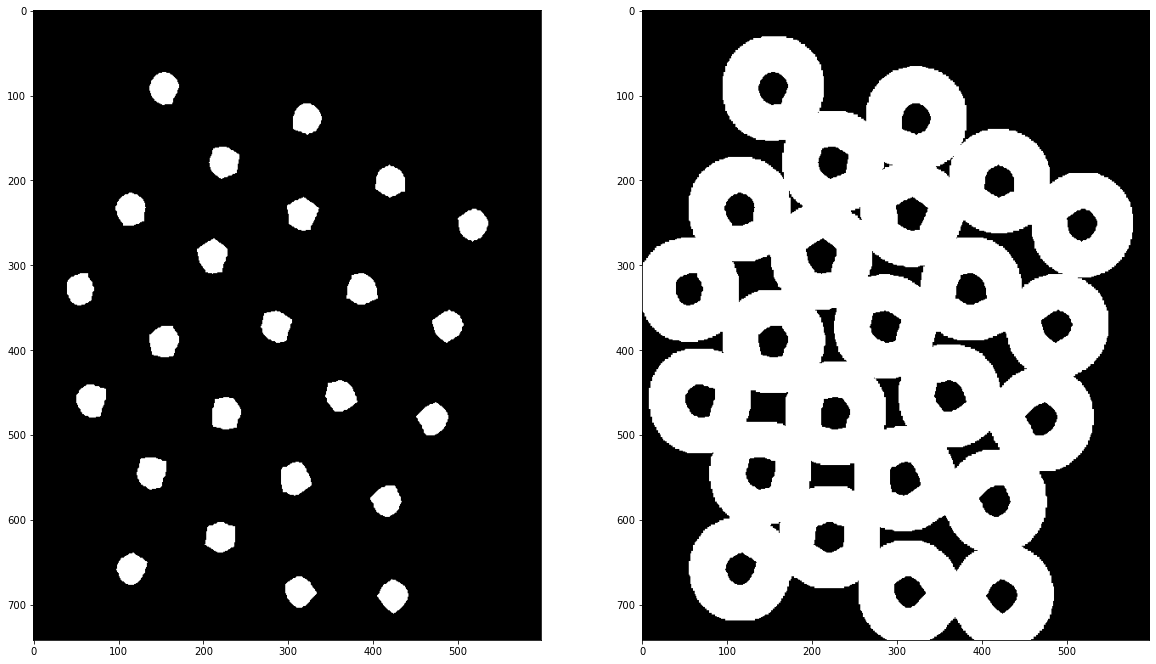

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(sure_fg,'gray')
plt.subplot(122), plt.imshow(unknown,'gray')
plt.show()

In [14]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers+=1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


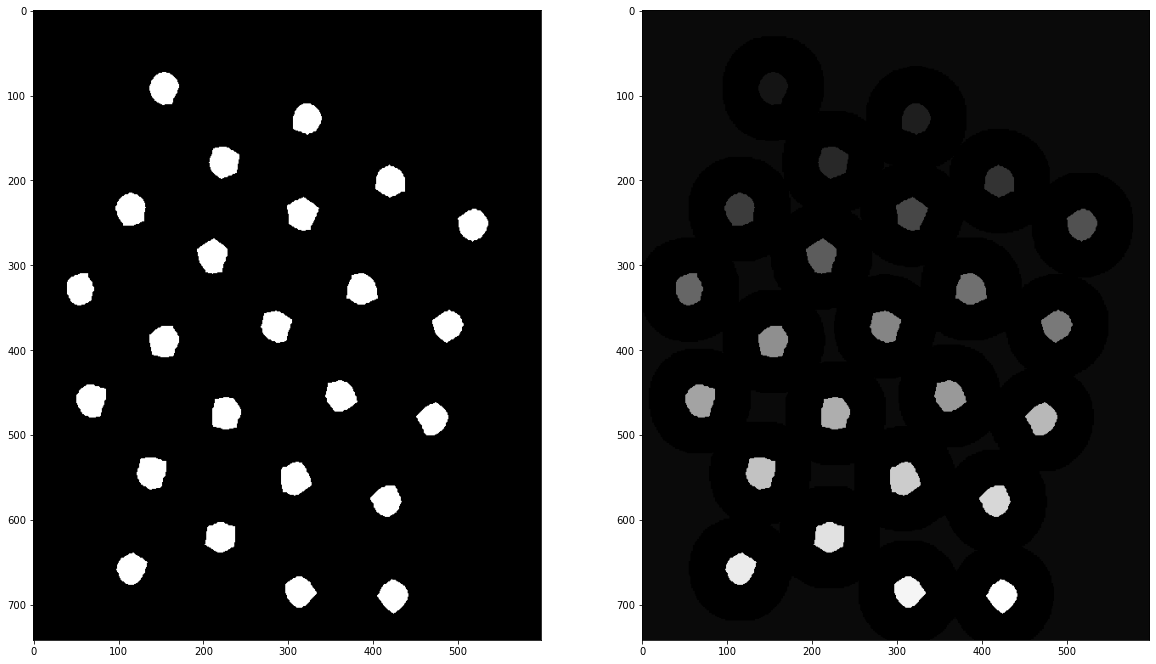

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(sure_fg,'gray')
plt.subplot(122), plt.imshow(markers,'gray')
plt.show()

In [16]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

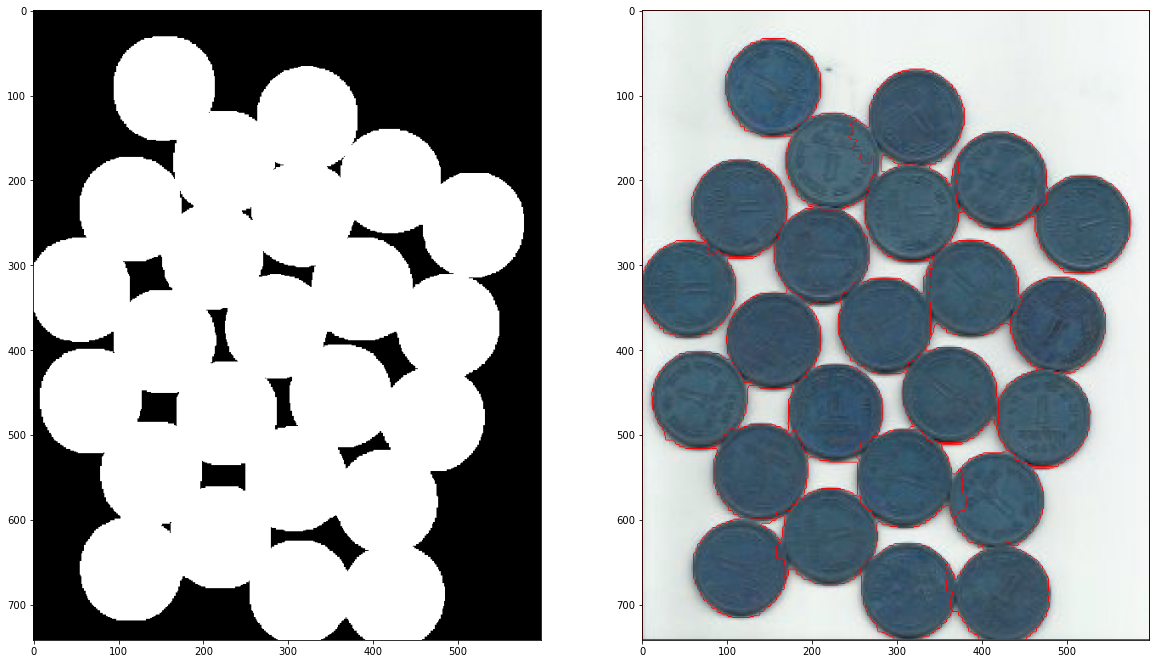

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(sure_bg,'gray')
plt.subplot(122), plt.imshow(img,'gray')
plt.show()